# Track Lengths

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zclaytor/kiauhoku/blob/dev/notebooks/eep_track_lengths.ipynb)

Here we look at the number of EEPs in each of the available model tracks. This is useful for debugging, such as when a track terminates before you expect it to, or catching instances when the EEP identification is wrong.

We'll also look at an example visualizing properties of the full tracks.

In [ ]:
# first install kiauhoku
%pip install git+https://github.com/zclaytor/kiauhoku@dev

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kiauhoku as kh

## YREC

### EEP tracks

In [2]:
# load tracks
yrec = kh.load_eep_grid("yrec")

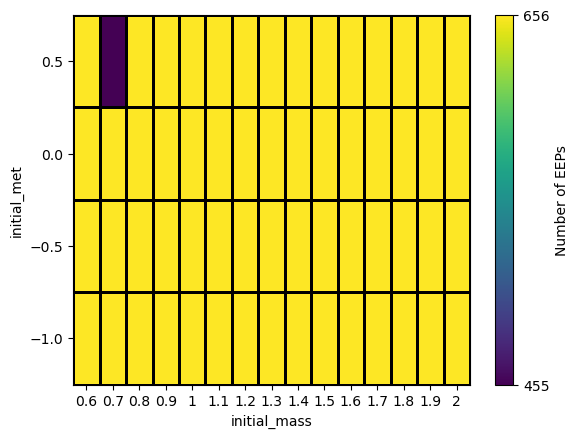

In [3]:
# make plot
im, fig, ax = yrec.plot_eep_track_lengths()

According to this graph, all but one of the YREC tracks make it to the tip of the red giant branch (TRGB). The one that terminates early has a mass of 0.7 Msun and metallicity of +0.5 dex. We can plot this track with its neighbors overtop of the full tracks to see what happens.

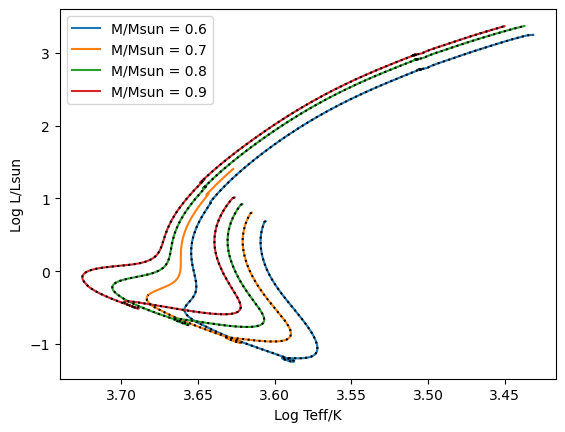

In [4]:
# load full tracks
yrec_full = kh.load_full_grid("yrec")

%matplotlib inline
met = 0.5
masses = [0.6, 0.7, 0.8, 0.9]

for i, m in enumerate(masses):
    color = f"C{i}"
    plt.plot("Log Teff(K)", "L/Lsun", data=yrec_full.loc[m, met], label=f"M/Msun = {m:3.1f}", color=color)
    plt.plot("Log Teff(K)", "L/Lsun", "k:", data=yrec.loc[m, met], label="_")

plt.gca().invert_xaxis()
plt.xlabel("Log Teff/K")
plt.ylabel("Log L/Lsun")
plt.legend();

The full track (solid line) makes it to the RGB bump, but not to the tip like its neighbors. As a result, the EEP track (black dotted line) terminates at the last available primary EEP, the terminal-age main sequence (TAMS).

### Full tracks

Since we've loaded the full tracks anyway, let's make a similar grid-like plot with the tracks' final logg values.

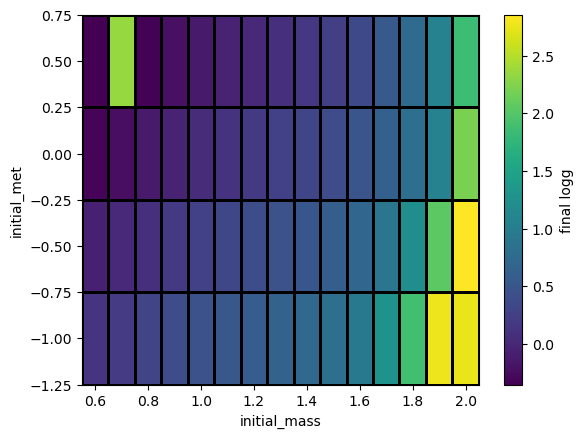

In [5]:
def get_last_values(grid, label):
    idx = grid.index.droplevel(-1).drop_duplicates()
    values = [grid.loc[i, label].iloc[-1] for i in idx]
    values = pd.DataFrame(values, index=idx, columns=[label])
    
    return values


%matplotlib inline
label = "logg"
values = get_last_values(yrec_full, label)
xvals = yrec.index.levels[0]
yvals = yrec.index.levels[1]
lvals = values.values.reshape(len(xvals), len(yvals)).T


plt.pcolormesh(xvals, yvals, lvals, edgecolors="k")

plt.xlabel("initial_mass")
plt.ylabel("initial_met")

plt.colorbar(label=f"final {label}");

That pesky 0.7-Msun track shows up in this view as well, terminating at a much higher logg than its neighbors.

These kinds of plots help us identify when things are going wrong with our tracks!

## Garstec

### EEP

In [6]:
# load tracks
gars = kh.load_eep_grid("garstec")

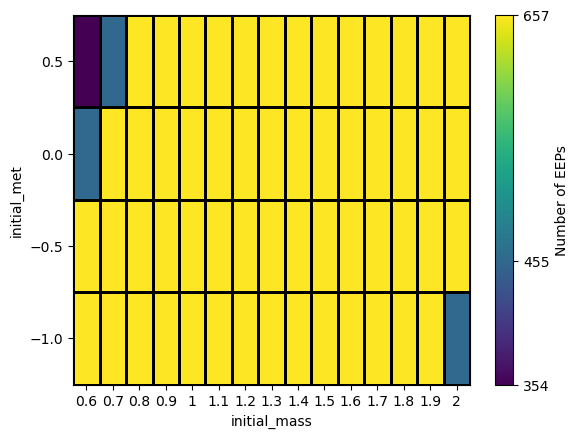

In [7]:
# make plot
im, fig, ax = gars.plot_eep_track_lengths()